In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [5]:
data=pd.read_csv('/kaggle/input/newrecipe/recipes.csv')

In [6]:
data.head()

,yemekAdi,yapilis,yeşil biber,ceviz içi,bulgur,kuru maya,kaşar peyniri,yaş maya,kutu ton balığı,esmer şeker,...,spagetti,sucuk,dövülmüş fındık,pide ekmeği,tavuk but,doğranmış havuç,salça,tavuk budu,karnıbahar,dana biftek
0,Kuru Fasulye,Kuru fasulyeyi bir gece önceden ıslatın. Ertes...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,İçli Köfte,"Bulguru ve irmiği sıcak suyla ıslatıp yoğurun,...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Lahmacun,"Hamur için unu maya ve suyla yoğurun, dinlendi...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Mantı,"Hamuru un, yumurta ve suyla yoğurup dinlendiri...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Zeytinyağlı Yaprak Sarma,Pirinci yıkayıp süzün. Soğanı zeytinyağında ka...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
data.tail()

,yemekAdi,yapilis,yeşil biber,ceviz içi,bulgur,kuru maya,kaşar peyniri,yaş maya,kutu ton balığı,esmer şeker,...,spagetti,sucuk,dövülmüş fındık,pide ekmeği,tavuk but,doğranmış havuç,salça,tavuk budu,karnıbahar,dana biftek
224,Kabaklı Mantar Çorbası,"Soğanı soteleyin, doğranmış kabak ve mantarlar...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
225,Beyaz Peynirli Patates Kızartması,Patatesleri doğrayıp kızartın. Üzerine beyaz p...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
226,Meyveli Yoğurtlu Kahvaltı,Yoğurdu bir kaseye alıp üzerine doğranmış muz ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227,Avokadolu Kahvaltı Tostu,Ekmek dilimlerini kızartın. Avokadoyu ezip üze...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228,Kremalı Peynirli Çörek,Hamuru yoğurup şekil verin ve içine krem peyni...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data = data.loc[:, ~(data == 0).all()]

In [9]:
data.head()

,yemekAdi,yapilis,yeşil biber,ceviz içi,bulgur,kuru maya,kaşar peyniri,yaş maya,kutu ton balığı,esmer şeker,...,spagetti,sucuk,dövülmüş fındık,pide ekmeği,tavuk but,doğranmış havuç,salça,tavuk budu,karnıbahar,dana biftek
0,Kuru Fasulye,Kuru fasulyeyi bir gece önceden ıslatın. Ertes...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,İçli Köfte,"Bulguru ve irmiği sıcak suyla ıslatıp yoğurun,...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Lahmacun,"Hamur için unu maya ve suyla yoğurun, dinlendi...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Mantı,"Hamuru un, yumurta ve suyla yoğurup dinlendiri...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Zeytinyağlı Yaprak Sarma,Pirinci yıkayıp süzün. Soğanı zeytinyağında ka...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
import pandas as pd
import pickle
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

def find_optimal_k(X, max_k=10):
    avg_distances = []

    for k in range(1, max_k + 1):
        knn = NearestNeighbors(n_neighbors=k, metric='cosine')
        knn.fit(X)

        distances, _ = knn.kneighbors(X)
        avg_distance = distances.mean()
        avg_distances.append(avg_distance)
        print(f"k={k}, Ortalama Mesafe: {avg_distance:.4f}")

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), avg_distances, marker='o', linestyle='-', color='b')
    plt.title('Elbow Yöntemi ile Optimal k Değeri')
    plt.xlabel('k Değeri (Komşu Sayısı)')
    plt.ylabel('Ortalama Mesafe')
    plt.grid(True)
    plt.show()


In [24]:
def cross_validate_model(X, k=3, model_path="knn_model.pkl"):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_scores = []

    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        print(f"Fold {fold + 1}/{k}")

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]

        knn = NearestNeighbors(n_neighbors=3, metric='cosine')
        knn.fit(X_train.values)

        distances, _ = knn.kneighbors(X_test.values)

        avg_distance = distances.mean()
        fold_scores.append(avg_distance)
        print(f"Fold {fold + 1} - Ortalama Mesafe: {avg_distance:.4f}\n")

    print(f"{k}-Fold Çapraz Doğrulama Ortalama Mesafe: {sum(fold_scores) / len(fold_scores):.4f}")

    knn.fit(X.values)
    with open(model_path, 'wb') as model_file:
        pickle.dump(knn, model_file)
        print("Son model başarıyla eğitildi ve kaydedildi.")

k=1, Ortalama Mesafe: 0.0000
k=2, Ortalama Mesafe: 0.1545
k=3, Ortalama Mesafe: 0.2267
k=4, Ortalama Mesafe: 0.2705
k=5, Ortalama Mesafe: 0.3007
k=6, Ortalama Mesafe: 0.3240
k=7, Ortalama Mesafe: 0.3433
k=8, Ortalama Mesafe: 0.3599
k=9, Ortalama Mesafe: 0.3745
k=10, Ortalama Mesafe: 0.3874


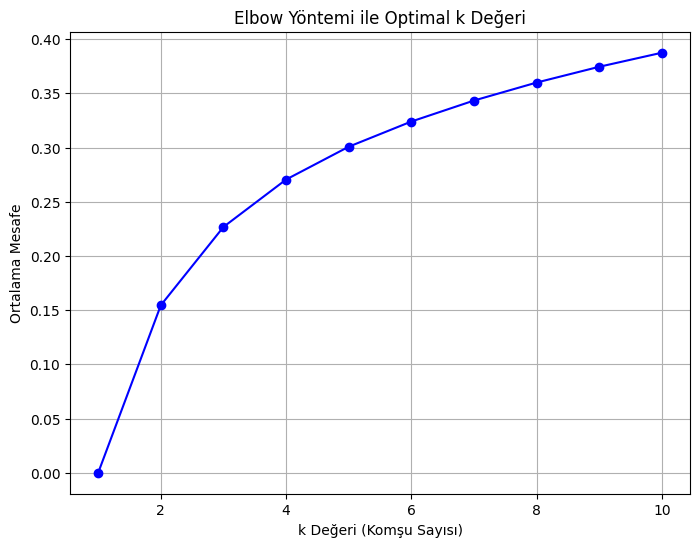

Fold 1/3
Fold 1 - Ortalama Mesafe: 0.3792

Fold 2/3
Fold 2 - Ortalama Mesafe: 0.3882

Fold 3/3
Fold 3 - Ortalama Mesafe: 0.3699

3-Fold Çapraz Doğrulama Ortalama Mesafe: 0.3791
Son model başarıyla eğitildi ve kaydedildi.


In [25]:
if __name__ == "__main__":
    # Veriyi yükle
    file_path = "/kaggle/input/newrecipe/recipes.csv"
    data = pd.read_csv(file_path)

    X = data.drop(columns=['yemekAdi', 'yapilis'])

    find_optimal_k(X, max_k=10)
    cross_validate_model(X)

Model başarıyla yüklendi.


Kullandığınız malzemeleri virgülle ayırarak girin (örnek: muz,patlıcan):  patlıcan,soğan,tuz


Vermiş olduğunuz malzemelere uygun yemek tariflerini aşağıda verdim. Afiyet olsun :)
1. Patlıcanlı Musakka (Benzerlik: 65%)
   Malzemeler: patlıcan, soğan, kıyma, tuz, zeytinyağı, karabiber, salça
   Yapılışı: Patlıcanları kızartın. Soğan ve kıymayı zeytinyağında kavurun, salça ve baharatları ekleyin. Kat kat dizip fırında 30 dakika pişirin.

2. Zeytinyağlı Barbunya (Benzerlik: 57%)
   Malzemeler: şeker, soğan, tuz, barbunya
   Yapılışı: Barbunyayı haşlayıp, soğanla zeytinyağında kavurun, şeker ve tuzla tatlandırın.

3. Şakşuka (Benzerlik: 57%)
   Malzemeler: yeşil biber, domates, patlıcan, tuz
   Yapılışı: Patlıcanları küp küp doğrayıp kızartın, domates ve biberi ekleyip pişirin.



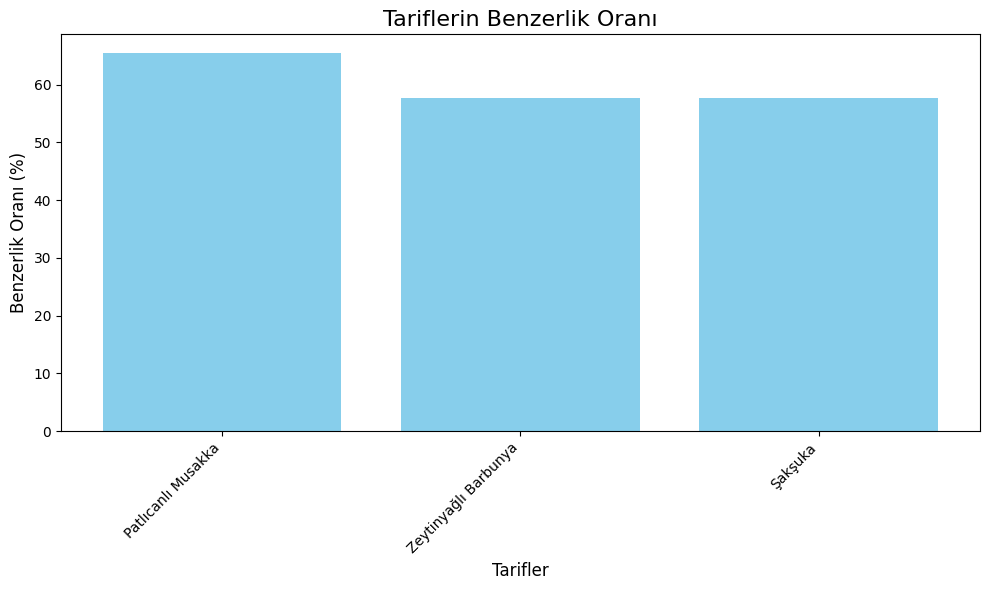

Kullanıcıdan alınan malzemeler:
patlıcan, soğan, tuz


In [21]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

def load_model(model_path="knn_model.pkl"):
    try:
        with open(model_path, 'rb') as model_file:
            knn = pickle.load(model_file)
            print("Model başarıyla yüklendi.")
    except FileNotFoundError:
        print("Model dosyası bulunamadı. Lütfen modeli eğitin.")
        exit()
    return knn

def create_user_vector(X, kullanici_malzemeleri):
    return np.array([[1 if malzeme in kullanici_malzemeleri else 0 for malzeme in X.columns]])

def predict_recipes(knn, X, y, kullanici_vektoru, data, kullanici_malzemeleri):
    mesafeler, indeksler = knn.kneighbors(kullanici_vektoru)
    benzerlik_oranlari = []
    tarif_isimleri = []

    print("Vermiş olduğunuz malzemelere uygun yemek tariflerini aşağıda verdim. Afiyet olsun :)")
    
    for i, indeks in enumerate(indeksler[0]):
        benzerlik = 1 - mesafeler[0][i] 
        tarif_adi = y.iloc[indeks]
        tarif_isimleri.append(tarif_adi)
        benzerlik_oranlari.append(benzerlik * 100)

        print(f"{i+1}. {tarif_adi} (Benzerlik: {int(benzerlik * 100)}%)")
        print(f"   Malzemeler: {', '.join(X.columns[X.iloc[indeks] == 1].tolist())}")
        print(f"   Yapılışı: {data.iloc[indeks]['yapilis']}\n")

    plot_similarity_graph(tarif_isimleri, benzerlik_oranlari)
    
    print("Kullanıcıdan alınan malzemeler:")
    print(", ".join(kullanici_malzemeleri))

def plot_similarity_graph(tarif_isimleri, benzerlik_oranlari):
    plt.figure(figsize=(10, 6))
    plt.bar(tarif_isimleri, benzerlik_oranlari, color='skyblue')

    plt.title('Tariflerin Benzerlik Oranı', fontsize=16)
    plt.xlabel('Tarifler', fontsize=12)
    plt.ylabel('Benzerlik Oranı (%)', fontsize=12)

    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

def main():
    file_path = "/kaggle/input/newrecipe/recipes.csv"
    data = pd.read_csv(file_path)

    y = data['yemekAdi']
    X = data.drop(columns=['yemekAdi', 'yapilis'])

    knn = load_model()

    kullanici_girisi = input("Kullandığınız malzemeleri virgülle ayırarak girin (örnek: muz,patlıcan): ")
    kullanici_malzemeleri = [malzeme.strip() for malzeme in kullanici_girisi.split(',')]

    kullanici_vektoru = create_user_vector(X, kullanici_malzemeleri)

    predict_recipes(knn, X, y, kullanici_vektoru, data, kullanici_malzemeleri)

if __name__ == "__main__":
    main()
